In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../complete_run'))

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [3]:
from classifier.models import conv_net, conv_net_one_layer
from classifier.analysis import MotifMatch

from utils.seq import one_hot_to_seq

In [4]:
model = conv_net_one_layer(filters=128, pool_size=100, fully_connected=100, drop=0.5)
model.load_state_dict(torch.load('../models/classifier/classifier.pth', map_location='cpu'))

<All keys matched successfully>

In [5]:
filters = model.state_dict()['net.0.weight'].numpy()

In [6]:
filter_seqs = []
for i, f in enumerate(filters.transpose(0, 2, 1)):
    filter_seqs.append(SeqRecord(one_hot_to_seq(f), id=str(i)))

In [7]:
with open('../memes/filter_seqs.fasta', 'w') as f:
    SeqIO.write(filter_seqs, f, 'fasta')

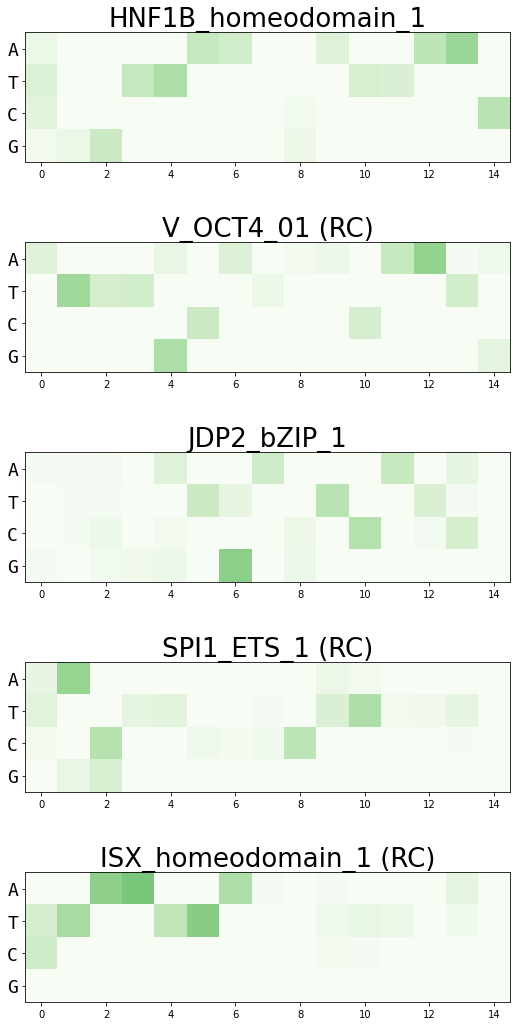

In [120]:

title_dict = {
    24: 'HNF1B_homeodomain_1',
    79: 'V_OCT4_01 (RC)',
    82: 'JDP2_bZIP_1',
    81: 'SPI1_ETS_1 (RC)',
    88: 'ISX_homeodomain_1 (RC)'
}
fig, ax = plt.subplots(5, 1, figsize=(8, 15))
fig.tight_layout(pad=3.0)
for i, n in enumerate([24, 79, 82, 81, 88]):
    ax[i].imshow(filters[n], cmap='Greens', vmin=0, vmax=2)
    ax[i].set_yticks([0, 1, 2, 3])
    ax[i].set_yticklabels(['A', 'T', 'C', 'G'], fontsize=18, fontfamily='monospace')
    ax[i].set_title(title_dict[n], fontsize=26)

plt.savefig('../figures/classifier/motif_filters_PB20200603.png')

In [98]:
pwm = np.loadtxt('../memes/embryonic/V_OCT4_01.txt').transpose()[(0, 3, 1, 2), :]
motif_match = MotifMatch(pwm)
filter_matches = motif_match.scan(filters)

In [99]:
top = filter_matches[:, 0].argsort()[::-1][:5]

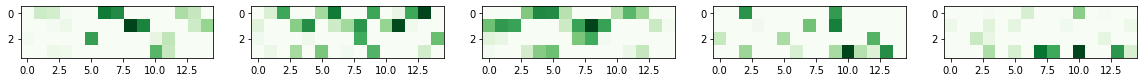

In [100]:


fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, am in enumerate(top):
    ax[i].imshow(filters[am], cmap='Greens', vmin=0)


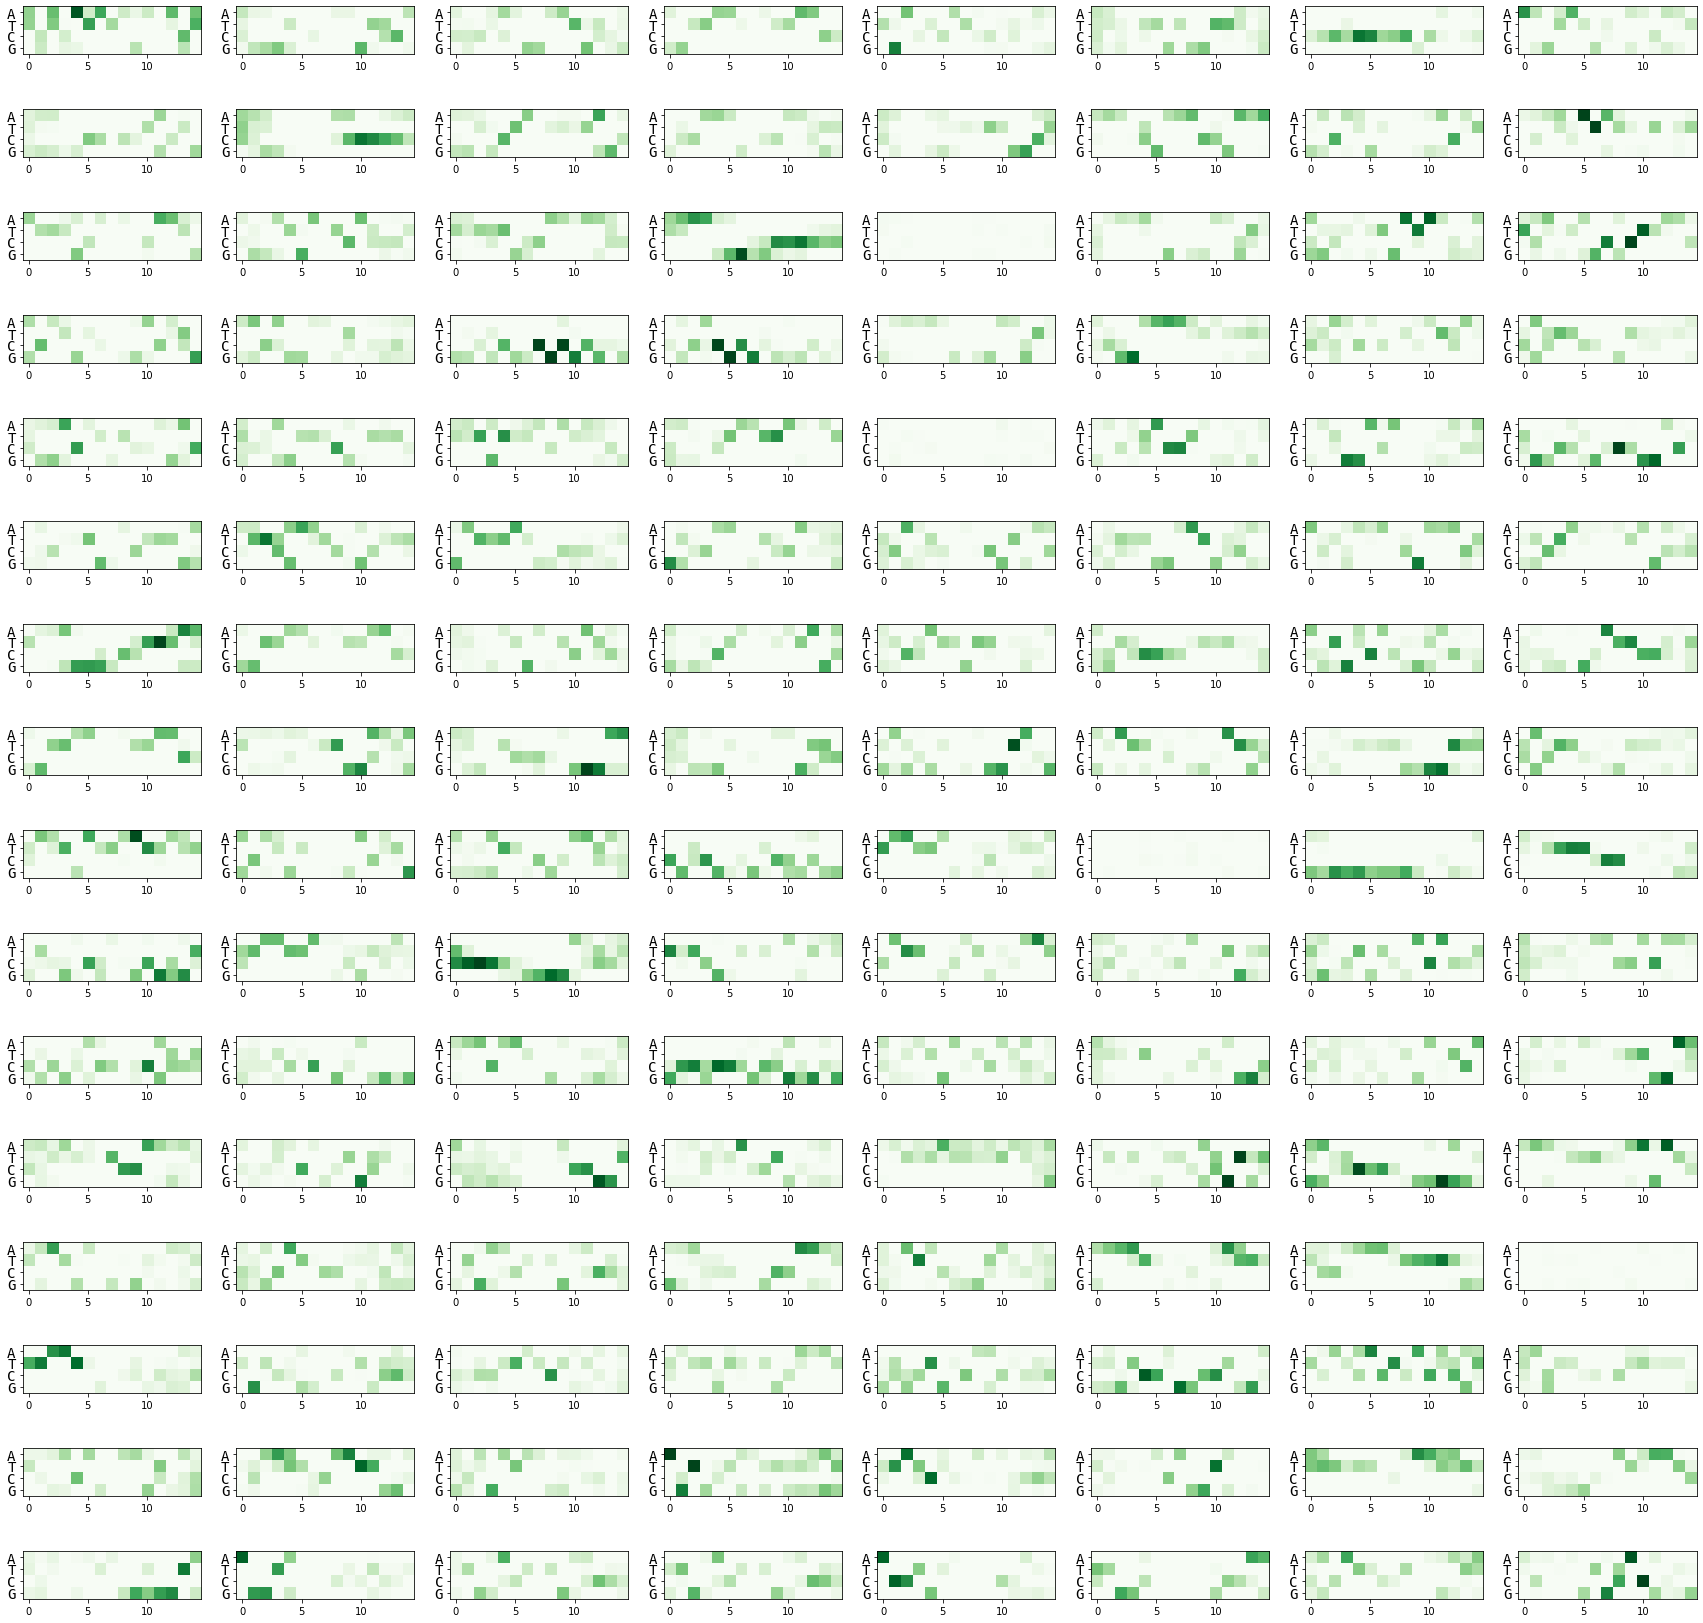

In [17]:
fig, ax = plt.subplots(16, 8, figsize=(30, 30))
for i in range(128):
    seq = model.state_dict()['net.0.weight'][i].squeeze().numpy()
    ax[i//8][i%8].imshow(seq, cmap='Greens', vmin=0, vmax=0.8)
    ax[i//8][i%8].set_yticks([0, 1, 2, 3])
    ax[i//8][i%8].set_yticklabels(['A', 'T', 'C', 'G'], fontsize=14, fontfamily='monospace')
plt.savefig('../figures/classifier/filter_grid_PB20200611.png')